## - 불러올 패키지 목록

In [1]:
# 파이썬 기본 패키지
import math  # 수학 함수 패키지
import itertools  # Functions creating iterators for efficient looping
from collections import Counter  # label별 데이터 카운트를 위한 모듈

# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# missingno 패키지 (데이터 전처리 전 결측치 확인)
import missingno as msno

# 전처리 및 모델 성능평가 관련 패키지
from sklearn.preprocessing import *  # 데이터 전처리를 위한 패키지
from sklearn.model_selection import *  # 데이터 분리, 검증 및 파라미터 튜닝을 위한 패키지
from sklearn.metrics import *  # 모델에 대한 다양한 성능 평가를 위한 패키지

# 시각화를 위한 패키지
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # 내장 colormap, colormap 처리 유틸리티
from matplotlib.colors import ListedColormap  # colors and colormaps
%matplotlib inline
# %matplotlib inline 의 목적은 plt.show()함수가 호출되지 않은 경우에도 matplotlib 다이어그램을 렌더링하는 것이다.
# 그러나 현재 업데이트된 버전의 주피터 노트북 버전에서는 %matplotlib inline 를 사용하지 않더라도 Matplotlib 다이어그램을 개체로 표현한다.
# 따라서 굳이 필요하지는 않다. 그러나 코드를 깨끗하게 유지하고 자신이 만든 플롯을 호출하기 위해 여전히 관례적으로 권장된다.

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 그래프 스타일 서식 지정
plt.style.use('default')

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 그래프 축의 음수 표현 오류 방지
plt.rcParams['axes.unicode_minus'] = False
#
####################################################################################

# pingouin 패키지 (통계분석 관련)
import pingouin as pg

# SciPy 패키지
import scipy
import scipy.stats as stats  # 통계 분석을 위한 패키지
from scipy.cluster.hierarchy import *  # 계층적 군집 분석을 위한 패키지
from scipy.stats import randint, uniform  # 균일한 이산 확률 변수 및 연속 확률 변수

# statsmodels 패키지
from statsmodels.api import *
from statsmodels.formula.api import *
from statsmodels.stats.api import *
from statsmodels.stats.proportion import *
from statsmodels.stats.diagnostic import *
from statsmodels.stats.weightstats import *

# 시계열 관련 statsmodels 패키지
from statsmodels.tsa.api import *
from statsmodels.tsa.ar_model import *
from statsmodels.tsa.arima.model import *
from statsmodels.tsa.arima_process import *
from statsmodels.tsa.statespace import *
from statsmodels.graphics.api import *
from statsmodels.graphics.tsaplots import *
#
####################################################################################

## 이론 및 코드 작성에 참고한 출처

- 기초이론 강의 (김성범 교수)
  - https://www.youtube.com/playlist?list=PLpIPLT0Pf7IqSuMx237SHRdLd5ZA4AQwd


- ARIMA 실습 (이지윤 조교)
  - https://www.youtube.com/watch?v=rdR2fNDq6v0&list=PLpIPLT0Pf7IqSuMx237SHRdLd5ZA4AQwd&index=11&t=216s

## 데이터 정보

- https://dacon.io/competitions/official/235837/overview/description

- bicycle_train.csv : 학습 데이터
  - date_time : 일별 날짜
  - wind_direction: 풍향 (degree)
  - sky_condition : 하늘 상태 (하단 설명 참조)
  - precipitation_form : 강수 형태 (하단 설명 참조)
  - wind_speed : 풍속 (m/s)
  - humidity : 습도 (%)
  - low_temp : 최저 기온 ( `C)
  - high_temp : 최고 기온 ( `C)
  - Precipitation_Probability : 강수 확률 (%)
  - number_of_rentals : 따릉이 대여량


- bicycle_test.csv : 테스트 데이터
  - date_time : 일별 날짜
  - wind_direction: 풍향
  - sky_condition : 하늘 상태
  - precipitation_form : 강수 형태
  - wind_speed : 풍속
  - humidity : 습도
  - low_temp : 최저 기온
  - high_temp : 최고 기온
  - Precipitation_Probability : 강수 확률


- sample_submissoin.csv : 제출 양식
  - date_time : 일별 날짜
  - number_of_rentals : 따릉이 대여량


- 데이터 상세 설명
  - 기상 데이터는 하루에 총 8번 3시간 간격으로 발표되는 기상단기예보(SHRT) 데이터를 1일 평균으로 변환한 데이터입니다.
  - sky_condition (하늘 상태) 코드 : 맑음(1), 구름많음(3), 흐림(4)
  - precipitation_form (강수 형태) 코드 : 없음(0), 비(1), 진눈깨비(2), 눈(3), 소나기(4)
  - 위 데이터는 4월~6월의 기상 데이터만을 추출한 것이기 때문에 없음(0), 비(1)만 등장했습니다.
  - 따라서 precipitation_form 이 0.5인 경우: "하루의 절반은 비가 올 것으로 예측하고, 나머지 절반은 맑을 것으로 예측했다"는 의미로 해석해주시기 바랍니다.


  - 위 자료는 아래 공공 데이터를 바탕으로 제작되었습니다.

  - [기상청] 기상자료개방포털
  - [서울특별시] 서울 열린데이터 광장

# 데이터프레임 생성 및 전처리

## 데이터프레임 생성 및 데이터 정보 확인

In [2]:
df = pd.read_csv('dacon_bicycle_train.csv')
df

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833
...,...,...,...,...,...,...,...,...,...,...
268,2020-06-26,228.662,3.980,0.223,2.271,78.378,20.500,27.526,36.486,96150
269,2020-06-27,207.770,2.865,0.081,1.794,78.412,20.812,28.842,21.081,107001
270,2020-06-28,282.568,1.730,0.000,1.820,72.736,21.000,29.053,7.297,98568
271,2020-06-29,137.027,2.257,0.088,2.043,70.473,19.625,26.000,15.541,70053


In [3]:
problem = pd.read_csv('dacon_bicycle_test.csv')
problem

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability
0,2021-04-01,108.833,3.000,0.000,2.900,28.333,11.800,20.667,18.333
1,2021-04-02,116.717,3.850,0.000,2.662,46.417,12.000,19.000,28.500
2,2021-04-03,82.669,4.000,0.565,2.165,77.258,8.875,16.368,52.847
3,2021-04-04,44.123,3.466,0.466,3.747,63.288,6.250,17.368,37.671
4,2021-04-05,147.791,1.500,0.000,1.560,48.176,7.188,18.684,4.459
...,...,...,...,...,...,...,...,...,...
86,2021-06-26,177.149,3.980,0.223,1.066,74.628,20.312,28.579,36.486
87,2021-06-27,138.723,2.777,0.135,1.290,70.236,20.812,29.000,18.378
88,2021-06-28,111.095,3.338,1.270,1.692,70.338,21.000,28.789,35.946
89,2021-06-29,171.622,3.270,0.595,1.470,70.473,21.000,29.421,27.770


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date_time                  273 non-null    object 
 1   wind_direction             273 non-null    float64
 2   sky_condition              273 non-null    float64
 3   precipitation_form         273 non-null    float64
 4   wind_speed                 273 non-null    float64
 5   humidity                   273 non-null    float64
 6   low_temp                   273 non-null    float64
 7   high_temp                  273 non-null    float64
 8   Precipitation_Probability  273 non-null    float64
 9   number_of_rentals          273 non-null    int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 21.5+ KB


## 날짜 데이터 전처리

In [5]:
# object 타입인 날짜 데이터를 datetime64 타입으로 변환 
df.date_time = pd.to_datetime( df.date_time )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date_time                  273 non-null    datetime64[ns]
 1   wind_direction             273 non-null    float64       
 2   sky_condition              273 non-null    float64       
 3   precipitation_form         273 non-null    float64       
 4   wind_speed                 273 non-null    float64       
 5   humidity                   273 non-null    float64       
 6   low_temp                   273 non-null    float64       
 7   high_temp                  273 non-null    float64       
 8   Precipitation_Probability  273 non-null    float64       
 9   number_of_rentals          273 non-null    int64         
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 21.5 KB


In [6]:
# 연도와 월을 추출하여 별도의 컬럼 추가
df['year'] = df.date_time.apply( lambda x : x.year )
df['month'] = df.date_time.apply( lambda x : x.month )

In [7]:
df.groupby( ['year', 'month'] ).count()

date_time  wind_direction  sky_condition  precipitation_form  \
year month                                                                 
2018 4             30              30             30                  30   
     5             31              31             31                  31   
     6             30              30             30                  30   
2019 4             30              30             30                  30   
     5             31              31             31                  31   
     6             30              30             30                  30   
2020 4             30              30             30                  30   
     5             31              31             31                  31   
     6             30              30             30                  30   

            wind_speed  humidity  low_temp  high_temp  \
year month                                              
2018 4              30        30        30         30   
     5              31        31        31         31   
     6              30        30        30         30   
2019 4              30        30        30         30   
     5              31        31        31         31   
     6              30        30        30         30   
2020 4              30        30        30         30   
     5              31        31        31         31   
     6              30        30        30         30   

            Precipitation_Probability  number_of_rentals  
year month                                                
2018 4                             30                 30  
     5                             31                 31  
     6                             30                 30  
2019 4                             30                 30  
     5                             31                 31  
     6                             30                 30  
2020 4                             30                 30  
     5                             31                 31  
     6                             30                 30

In [8]:
data = df.iloc[:, [0, 9] ]
data = data.set_index('date_time')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 273 entries, 2018-04-01 to 2020-06-30
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   number_of_rentals  273 non-null    int64
dtypes: int64(1)
memory usage: 4.3 KB


In [9]:
data = df.iloc[:, 9]
data

0       22994
1       28139
2       26817
3       26034
4        2833
        ...  
268     96150
269    107001
270     98568
271     70053
272     38086
Name: number_of_rentals, Length: 273, dtype: int64

## 그래프 개형 확인

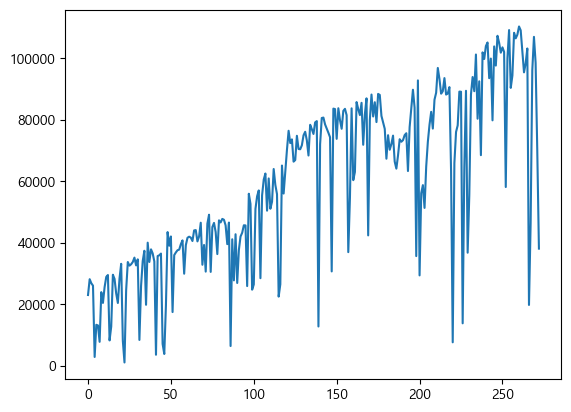

In [10]:
fig = data.plot()

## 시계열 분해

- `statsmodels.tsa.seasonal.seasonal_decompose( x, model='additive', filt=None, period=None, two_sided=True, extrapolate_trend=0 )`
  - https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html
  - model :
    - 'additive' : Trend, Seasonal, Resid 가 더해져서 해당 값을 구성한다고 가정
    - 'multiplicative' : Trend, Seasonal, Resid 가 곱해져서 해당 값을 구성한다고 가정
  - fit : 
  - period : 
  - two_sided : 
  - extrapolate_trend : 

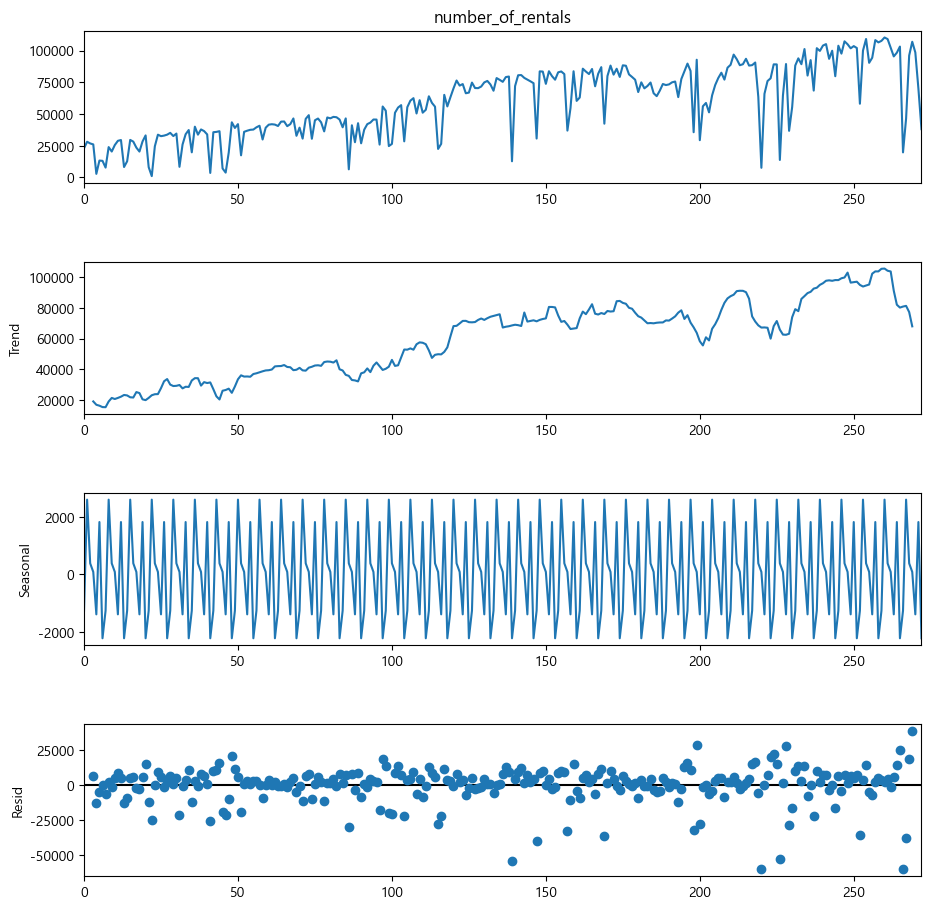

In [11]:
decomposition = seasonal_decompose( data,
                                    period = 7 )

fig = decomposition.plot()
fig.set_size_inches(10,10)
plt.show()

# Data Set 분리
- 시계열 데이터의 경우 순서가 뒤섞이면 안되기 때문에 `suffle = False` 옵션 적용

In [12]:
train_data, test_data = train_test_split( data,
                                          test_size = 0.15,
                                          shuffle = False )  # 시계열 데이터이므로 순서가 뒤섞이면 안됨.

# ACF 및 PACF 확인

- `statsmodels.graphics.tsaplots.plot_acf( x, ax=None, lags=None, *, alpha=0.05, use_vlines=True, adjusted=False, fft=False, missing='none', title='Autocorrelation', zero=True, auto_ylims=False, bartlett_confint=True, vlines_kwargs=None, **kwargs )`
  - https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_acf.html



- `statsmodels.graphics.tsaplots.plot_pacf( x, ax=None, lags=None, alpha=0.05, method=None, use_vlines=True, title='Partial Autocorrelation', zero=True, vlines_kwargs=None, **kwargs )`
  - https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_pacf.html

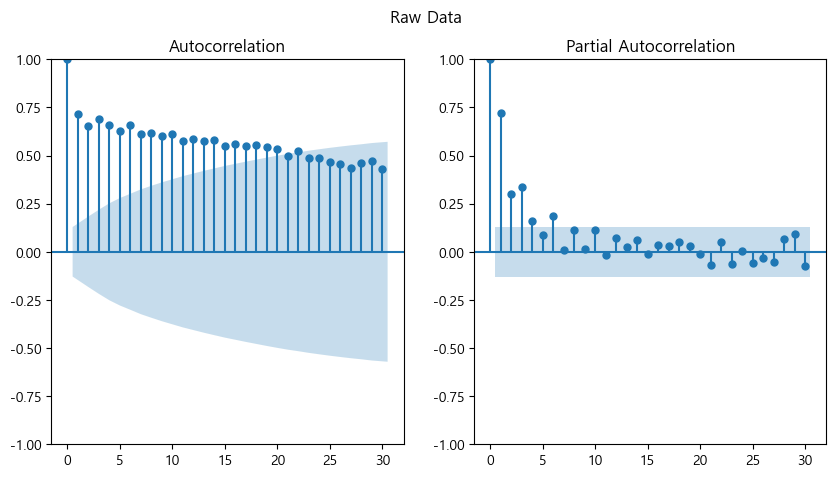

In [13]:
fig, ax = plt.subplots( 1, 2, figsize = (10,5))
fig.suptitle('Raw Data')

plot_acf( train_data, lags = 30, ax=ax[0] )
plot_pacf( train_data, lags = 30, ax=ax[1] );

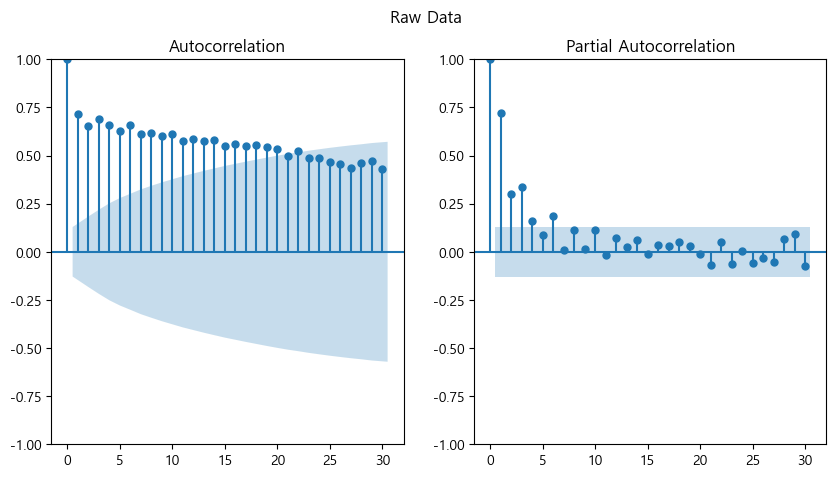

In [14]:
fig, ax = plt.subplots( 1, 2, figsize = (10,5))
fig.suptitle('Raw Data')

plot_acf( train_data.values.squeeze(), lags = 30, ax=ax[0])
plot_pacf( train_data.values.squeeze(), lags = 30, ax=ax[1]);

# 차분(Differencing)

- `pandas.Series.diff( periods=1 )`  
https://pandas.pydata.org/docs/reference/api/pandas.Series.diff.html

- `pandas.DataFrame.diff( periods=1, axis=0 )`  
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.diff.html

## 1차 차분

In [15]:
diff_train = train_data.copy()

# 1차 차분
diff_train = diff_train.diff( periods = 1 )
diff_train

0          NaN
1       5145.0
2      -1322.0
3       -783.0
4     -23201.0
        ...   
227    50767.0
228    24900.0
229   -52688.0
230    18795.0
231    32701.0
Name: number_of_rentals, Length: 232, dtype: float64

In [16]:
# 결측치 확인
diff_train.isnull().groupby( diff_train.isnull() == True ).count()

number_of_rentals
False    231
True       1
Name: number_of_rentals, dtype: int64

In [17]:
# 결측치 제거
diff_train = diff_train.dropna()

print('< RAW DATA >' )
print(train_data)
print()
print('< Differenced DATA >' )
print(diff_train)

< RAW DATA >
0      22994
1      28139
2      26817
3      26034
4       2833
       ...  
227    64549
228    89449
229    36761
230    55556
231    88257
Name: number_of_rentals, Length: 232, dtype: int64

< Differenced DATA >
1       5145.0
2      -1322.0
3       -783.0
4     -23201.0
5      10464.0
        ...   
227    50767.0
228    24900.0
229   -52688.0
230    18795.0
231    32701.0
Name: number_of_rentals, Length: 231, dtype: float64


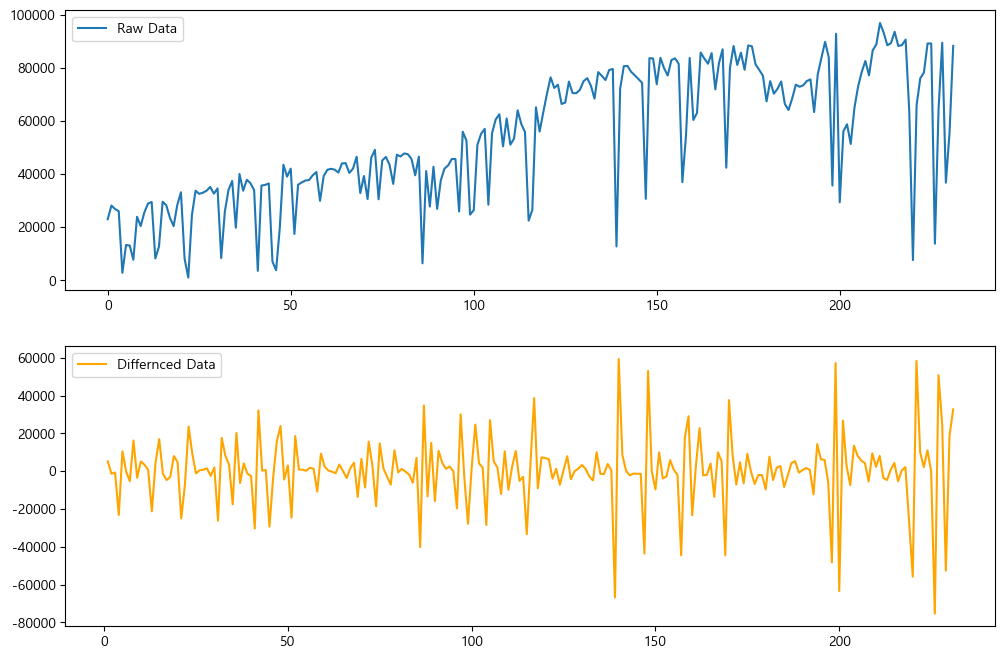

In [18]:
plt.figure( figsize=(12,8) )

plt.subplot(211)
plt.plot(train_data)
plt.legend(['Raw Data'])

plt.subplot(212)
plt.plot(diff_train, 'orange')
plt.legend(['Differnced Data'])

plt.show()

## 차분 후 ACF 및 PACF 확인

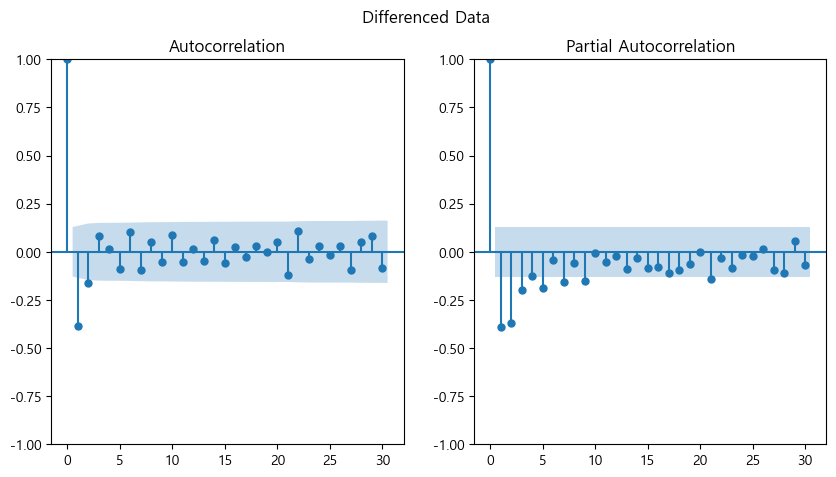

In [19]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
fig.suptitle('Differenced Data')

plot_acf( diff_train.values.squeeze(), lags = 30, ax=ax[0])
plot_pacf( diff_train.values.squeeze(), lags = 30, ax=ax[1]);

# 시계열 분석 - ARIMA

- 모델 생성  
`statsmodels.tsa.arima.model.ARIMA( endog, exog=None, order=(0, 0, 0), seasonal_order=(0, 0, 0, 0), trend=None, enforce_stationarity=True, enforce_invertibility=True, concentrate_scale=False, trend_offset=1, dates=None, freq=None, missing='none', validate_specification=True )`
  - https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMA.html
  - Parameters :
    - trend = {‘n’,’c’,’t’,’ct’}
  - Methods :
    - `.fit` : 모델 적합 및 매개변수 추정
      - Returns : `ARIMAResults`


- 훈련 데이터 이후를 예측
  - 예측 (Out-of-sample forecasts)
    - `ARIMAResults.forecast( steps=1, **kwargs )`
      - https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMAResults.forecast.html
  - forecasts and prediction intervals  
    - `ARIMAResults.get_forecast( steps=1, **kwargs )`
      - https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMAResults.get_forecast.html
      - Returns : `PredictionResults`
        - Method : `.conf_int( alpha = 0.05 )`


- 적합된 모델을 바탕으로 임의의 구간을 예측
  - 예측 (In-sample prediction and out-of-sample forecasting)
    - https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMAResults.predict.html
    - `ARIMAResults.predict( start=None, end=None, exog=None, typ='linear', dynamic=False )`
  - prediction and prediction intervals
    - `ARIMAResults.get_prediction( start=None, end=None, dynamic=False, index=None, exog=None, extend_model=None, extend_kwargs=None, **kwargs )`
      - https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMAResults.get_prediction.html
      - Returns : `PredictionResults`
        - Method : `.conf_int( alpha = 0.05 )`

## 최적 파라미터 탐색 : ARIMA

In [20]:
# 최적 파라미터 탐색 : ARIMA

p = range(0,4)
d = range(0,2)
q = range(0,4)

pdq = list(itertools.product(p, d, q))

aic = []

for i in pdq:
    model = ARIMA( train_data, order = (i), trend = 'n' )
    fit_model = model.fit()
    print( f'ARIMA: {i} >> AIC : {round(fit_model.aic, 2)}' )   
    aic.append( round(fit_model.aic, 2) )    
print()


# AIC 작은 순서대로 정렬하여 상위 3개 추출
aic_copy = aic.copy()
aic_copy.sort()

optimal_1 = [ (pdq[i], j) for i, j in enumerate(aic) if j == aic_copy[0] ]
optimal_2 = [ (pdq[i], j) for i, j in enumerate(aic) if j == aic_copy[1] ]
optimal_3 = [ (pdq[i], j) for i, j in enumerate(aic) if j == aic_copy[2] ]

print( '< 1st optimal >',
      '\npdq =', optimal_1[0][0],
      '\nminimum AIC =', optimal_1[0][1] )
print()
print( '< 2nd optimal >',
      '\npdq =', optimal_2[0][0],
      '\nminimum AIC =', optimal_2[0][1] )
print()
print( '< 3rd optimal >',
      '\npdq =', optimal_3[0][0],
      '\nminimum AIC =', optimal_3[0][1] )

ARIMA: (0, 0, 0) >> AIC : 5757.71
ARIMA: (0, 0, 1) >> AIC : 5622.97
ARIMA: (0, 0, 2) >> AIC : 5594.13
ARIMA: (0, 0, 3) >> AIC : 5585.99
ARIMA: (0, 1, 0) >> AIC : 5189.51
ARIMA: (0, 1, 1) >> AIC : 5095.34
ARIMA: (0, 1, 2) >> AIC : 5092.5
ARIMA: (0, 1, 3) >> AIC : 5093.66
ARIMA: (1, 0, 0) >> AIC : 5210.95
ARIMA: (1, 0, 1) >> AIC : 5122.92
ARIMA: (1, 0, 2) >> AIC : 5119.32
ARIMA: (1, 0, 3) >> AIC : 5120.21
ARIMA: (1, 1, 0) >> AIC : 5154.05
ARIMA: (1, 1, 1) >> AIC : 5094.04
ARIMA: (1, 1, 2) >> AIC : 5093.41
ARIMA: (1, 1, 3) >> AIC : 5096.23
ARIMA: (2, 0, 0) >> AIC : 5177.91
ARIMA: (2, 0, 1) >> AIC : 5120.89
ARIMA: (2, 0, 2) >> AIC : 5124.4
ARIMA: (2, 0, 3) >> AIC : 5121.3
ARIMA: (2, 1, 0) >> AIC : 5120.99
ARIMA: (2, 1, 1) >> AIC : 5094.41
ARIMA: (2, 1, 2) >> AIC : 5095.19
ARIMA: (2, 1, 3) >> AIC : 5091.15
ARIMA: (3, 0, 0) >> AIC : 5145.73
ARIMA: (3, 0, 1) >> AIC : 5122.0
ARIMA: (3, 0, 2) >> AIC : 5122.69
ARIMA: (3, 0, 3) >> AIC : 5118.91
ARIMA: (3, 1, 0) >> AIC : 5114.31
ARIMA: (3, 1, 1) >

## 모델 생성 및 적합

In [21]:
model = ARIMA( train_data,
               order = (2, 1, 3),
               trend = 't' )
fit_model = model.fit()

print( fit_model.summary() )

                               SARIMAX Results                                
Dep. Variable:      number_of_rentals   No. Observations:                  232
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -2538.165
Date:                Thu, 04 Nov 2021   AIC                           5090.330
Time:                        15:58:24   BIC                           5114.427
Sample:                             0   HQIC                          5100.049
                                - 232                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1           282.4946    123.521      2.287      0.022      40.397     524.592
ar.L1         -1.5102      0.187     -8.076      0.000      -1.877      -1.144
ar.L2         -0.5348      0.181     -2.961      0.0

### 잔차분석

In [22]:
train_data.size

232

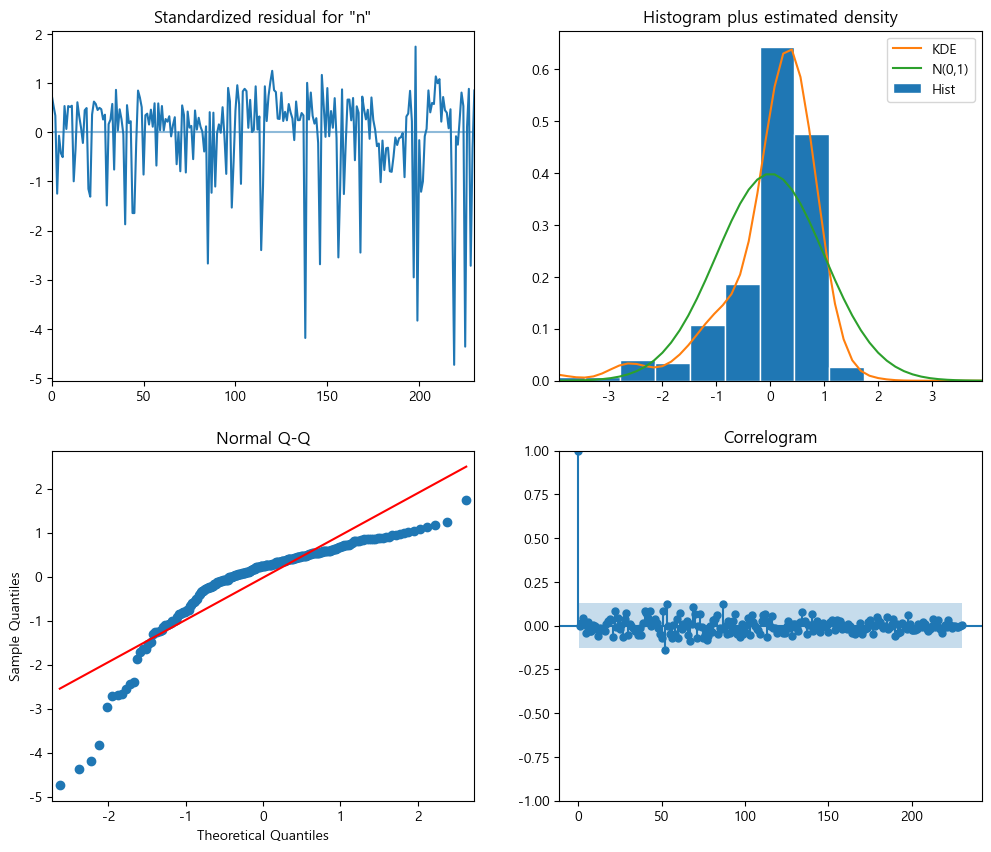

In [23]:
fit_model.plot_diagnostics( figsize =(12,10), lags = 230);

## 예측 및 평가

### 훈련 데이터 이후에 대한 예측

In [24]:
# train data 로부터 얼마 이후까지 예측할 것인지 지정
ahead = test_data.size

# 학습 데이터 이후를 예측한 값
forecast = fit_model.forecast( ahead )

# 예측값의 신뢰구간
forecast_interval = fit_model.get_forecast( steps = ahead ).conf_int(alpha = 0.05)

# 예측값과 신뢰구간에 대한 데이터프레임
forecast_result = pd.concat( [forecast, forecast_interval], axis = 1).round(3)
print(forecast_result)
print()

# R-squared
r2 = r2_score(test_data, forecast)
print( 'R-squared = ', r2.round(4) )
print()

# RMSE (Root Mean Squared Error)
rmse = mean_squared_error( test_data, forecast, squared=False)
print( 'RMSE: %.4f' % rmse )
print()

     predicted_mean  lower number_of_rentals  upper number_of_rentals
232       69924.689                40833.269                99016.110
233       74178.282                43931.306               104425.258
234       70160.284                39892.143               100428.426
235       74813.550                44279.678               105347.422
236       70795.304                40063.568               101527.040
237       75235.194                44380.705               106089.684
238       71539.318                40407.932               102670.704
239       75606.484                44380.387               106832.581
240       72301.086                40784.187               103817.986
241       75977.893                44369.231               107586.556
242       73053.179                41161.654               104944.703
243       76363.850                44376.840               108350.860
244       73788.476                41531.970               106044.982
245       76767.391 

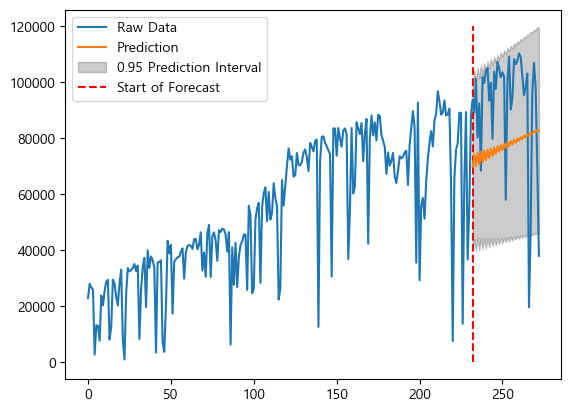

In [26]:
# 그래프 출력
pred_value = forecast_result.iloc[:,0]
pred_lower = forecast_result.iloc[:,1]
pred_upper = forecast_result.iloc[:,2]

plt.plot( data, label = 'Raw Data' )
plt.plot( forecast, label = 'Prediction' )
plt.fill_between( forecast.index, pred_lower, pred_upper,
                  color = 'k', alpha = 0.2,
                  label = '0.95 Prediction Interval' )

plt.vlines( test_data.index[0], 0, 120000,
            linestyle = '--', color = 'r',
            label = 'Start of Forecast' )

plt.legend()
plt.show()

### 임의의 구간 예측

In [ ]:
start = 0
end = 270

# 예측 구간 설정
start_index = data.index[ start ]
end_index = data.index[ end ]

# 임의의 구간의 데이터에 적합모델을 적용하여 예측한 값
prediction = fit_model.predict( start = start_index,
                                end = end_index )

# 예측값의 신뢰구간
prediction_interval = fit_model.get_prediction( start = start_index,
                                                end = end_index ).conf_int(alpha = 0.05)

# 예측값과 신뢰구간에 대한 데이터프레임
pred_result = pd.concat( [prediction, prediction_interval], axis = 1)
print(pred_result)
print()

# R-squared 산출
r2 = r2_score( data[ start : end+1 ], prediction )
print( 'R-squared = ', r2.round(4))
print()

# RMSE (Root Mean Squared Error)
rmse = mean_squared_error( data[ start : end+1 ], prediction, squared=False)
print( 'RMSE: %.4f' % rmse )
print()

In [ ]:
# 그래프 출력
pred_value = pred_result.iloc[:,0]
pred_lower = pred_result.iloc[:,1]
pred_upper = pred_result.iloc[:,2]

plt.plot( data, label = 'Raw Data' )
plt.plot( prediction, label = 'Prediction' )
plt.fill_between( prediction.index, pred_lower, pred_upper,
                  color = 'k', alpha = 0.2,
                  label = '0.95 Prediction Interval' )

plt.vlines( test_data.index[0], -20000, 120000,
            linestyle = '--', color = 'r',
            label = 'Start of Forecast' )

plt.legend()
plt.show()

# 시계열 분석 - SARIMA

- 모델 생성  
`statsmodels.tsa.statespace.sarimax.SARIMAX( endog, exog=None, order=(1, 0, 0), seasonal_order=(0, 0, 0, 0), trend=None, measurement_error=False, time_varying_regression=False, mle_regression=True, simple_differencing=False, enforce_stationarity=True, enforce_invertibility=True, hamilton_representation=False, concentrate_scale=False, trend_offset=1, use_exact_diffuse=False, dates=None, freq=None, missing='none', validate_specification=True, **kwargs )`  
https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html


- 예측 (Out-of-sample forecasts)  
`MLEResults.forecast( steps=1, **kwargs )`  
https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.mlemodel.MLEResults.forecast.html

- forecasts and prediction intervals  
`MLEResults.get_forecast( steps=1, **kwargs )`  
Method : `.conf_int( alpha = 0.05 )`  
https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.mlemodel.MLEResults.get_forecast.html

- 예측 (In-sample prediction and out-of-sample forecasting)  
`MLEResults.predict( start=None, end=None, dynamic=False, **kwargs )`  
https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.mlemodel.MLEResults.predict.html

- prediction and prediction intervals  
`MLEResults.get_prediction( start=None, end=None, dynamic=False, index=None, exog=None, extend_model=None, extend_kwargs=None, **kwargs )`  
Method : `.conf_int( alpha = 0.05 )`  
https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.mlemodel.MLEResults.get_prediction.html

## 최적 파라미터 탐색 : SARIMA

In [ ]:
# seasonal period 설정
season = 7


# 최적 파라미터 탐색 : SARIMA
p = range(0,3)
d = range(1,2)
q = range(0,3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [ ( x[0], x[1], x[2], season ) for x in list(itertools.product(p, d, q)) ] # 1개월 단위의 계절변동을 보이므로 12 입력

aic = []
params = []

for i in pdq:
    for j in seasonal_pdq:
        try:
            model = SARIMAX( train_data, order = (i), seasonal_order = (j) )
            fit_model = model.fit()
            print( f'SARIMA: {i}{j} >> AIC : {round(fit_model.aic, 2)}' )
            aic.append( round(fit_model.aic, 2) )
            params.append( (i, j) )
        except:
            continue
print()


# AIC 작은 순서대로 정렬하여 상위 3개 추출
aic_copy = aic.copy()
aic_copy.sort()

optimal_1 = [ (params[i], j) for i, j in enumerate(aic) if j == aic_copy[0] ]
optimal_2 = [ (params[i], j) for i, j in enumerate(aic) if j == aic_copy[1] ]
optimal_3 = [ (params[i], j) for i, j in enumerate(aic) if j == aic_copy[2] ]

print( '< 1st optimal >',
      '\npdq =', optimal_1[0][0][0],
      '\nseasonal_pdq =', optimal_1[0][0][1],
      '\nminimum AIC =', optimal_1[0][1] )
print()
print( '< 2nd optimal >',
      '\npdq =', optimal_2[0][0][0],
      '\nseasonal_pdq =', optimal_2[0][0][1],
      '\nminimum AIC =', optimal_2[0][1] )
print()
print( '< 3rd optimal >',
      '\npdq =', optimal_3[0][0][0],
      '\nseasonal_pdq =', optimal_3[0][0][1],
      '\nminimum AIC =', optimal_3[0][1] )

SARIMA: (0, 1, 0)(0, 1, 0, 7) >> AIC : 5195.19
SARIMA: (0, 1, 0)(0, 1, 1, 7) >> AIC : 5054.1
SARIMA: (0, 1, 0)(0, 1, 2, 7) >> AIC : 5053.45
SARIMA: (0, 1, 0)(1, 1, 0, 7) >> AIC : 5107.0
SARIMA: (0, 1, 0)(1, 1, 1, 7) >> AIC : 5053.17
SARIMA: (0, 1, 0)(1, 1, 2, 7) >> AIC : 5063.19
SARIMA: (0, 1, 0)(2, 1, 0, 7) >> AIC : 5098.9
SARIMA: (0, 1, 0)(2, 1, 1, 7) >> AIC : 5054.29
SARIMA: (0, 1, 0)(2, 1, 2, 7) >> AIC : 5064.73
SARIMA: (0, 1, 1)(0, 1, 0, 7) >> AIC : 5090.86
SARIMA: (0, 1, 1)(0, 1, 1, 7) >> AIC : 4961.78
SARIMA: (0, 1, 1)(0, 1, 2, 7) >> AIC : 4962.47
SARIMA: (0, 1, 1)(1, 1, 0, 7) >> AIC : 5039.55
SARIMA: (0, 1, 1)(1, 1, 1, 7) >> AIC : 4962.46
SARIMA: (0, 1, 1)(1, 1, 2, 7) >> AIC : 5014.27
SARIMA: (0, 1, 1)(2, 1, 0, 7) >> AIC : 5031.15
SARIMA: (0, 1, 1)(2, 1, 1, 7) >> AIC : 5014.68
SARIMA: (0, 1, 1)(2, 1, 2, 7) >> AIC : 4966.49
SARIMA: (0, 1, 2)(0, 1, 0, 7) >> AIC : 5086.69
SARIMA: (0, 1, 2)(0, 1, 1, 7) >> AIC : 4959.13
SARIMA: (0, 1, 2)(0, 1, 2, 7) >> AIC : 5011.14
SARIMA: (0, 1, 2

## 모델 생성 및 적합

In [ ]:
model = SARIMAX( train_data,
                 order = (0, 1, 2),
                 seasonal_order = (1, 1, 0, 7) )

fit_model = model.fit()

print( fit_model.summary() )

### 잔차분석

In [ ]:
fit_model.plot_diagnostics( figsize =(12,10), lags = 30);

## 예측 및 평가

### 훈련 데이터 이후에 대한 예측

In [ ]:
# train data 로부터 얼마 이후까지 예측할 것인지 지정
ahead = test_data.size

# 학습 데이터 이후를 예측한 값
forecast = fit_model.forecast( ahead )

# 예측값의 신뢰구간
forecast_interval = fit_model.get_forecast( steps = ahead ).conf_int(alpha = 0.05)

# 예측값과 신뢰구간에 대한 데이터프레임
forecast_result = pd.concat( [forecast, forecast_interval], axis = 1)
print(forecast_result)
print()

# R-squared 산출
r2 = r2_score(test_data, forecast)
print( 'R-squared = ', r2.round(4))
print()

# RMSE (Root Mean Squared Error)
rmse = mean_squared_error( test_data, forecast, squared=False)
print( 'RMSE: %.4f' % rmse )
print()

In [ ]:
# 그래프 출력

pred_value = forecast_result.iloc[:,0]
pred_lower = forecast_result.iloc[:,1]
pred_upper = forecast_result.iloc[:,2]

plt.plot( data, label = 'Raw Data' )
plt.plot( forecast, label = 'Prediction' )
plt.fill_between( forecast.index, pred_lower, pred_upper,
                  color = 'k', alpha = 0.2,
                  label = '0.95 Prediction Interval' )

plt.vlines( test_data.index[0], 0, 120000,
            linestyle = '--', color = 'r',
            label = 'Start of Forecast' )

plt.legend()
plt.show()

### 훈련 데이터 이후에 대한 예측

In [ ]:
start = 0
end = 270

# 예측 구간 설정
start_index = data.index[ start ]
end_index = data.index[ end ]

# 전체 데이터에 적합모델을 적용하여 예측한 값
prediction = fit_model.predict( start = start_index,
                                end = end_index )

# 예측값의 신뢰구간
prediction_interval = fit_model.get_prediction( start = start_index,
                                                end = end_index ).conf_int(alpha = 0.05)

# 예측값과 신뢰구간에 대한 데이터프레임
pred_result = pd.concat( [prediction, prediction_interval], axis = 1)
print(pred_result)
print()

# R-squared 산출
r2 = r2_score( data[ start : end+1 ], prediction )
print( 'R-squared = ', r2.round(4))
print()

# RMSE (Root Mean Squared Error)
rmse = mean_squared_error( data[ start : end+1 ], prediction, squared=False)
print( 'RMSE: %.4f' % rmse )
print()

In [ ]:
# 그래프 출력
pred_value = pred_result.iloc[:,0]
pred_lower = pred_result.iloc[:,1]
pred_upper = pred_result.iloc[:,2]

plt.plot( data, label = 'Raw Data' )
plt.plot( prediction, label = 'Prediction' )
plt.fill_between( prediction.index, pred_lower, pred_upper,
                  color = 'k', alpha = 0.2,
                  label = '0.95 Prediction Interval' )

plt.vlines( test_data.index[0], -20000, 120000,
            linestyle = '--', color = 'r',
            label = 'Start of Forecast' )

plt.legend()
plt.show()